## 1. Preparation & transformation

In [219]:
# Import library

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [220]:
# Read csv data file

df = pd.read_csv('data/college_plans.csv')

# cols = list(df.columns)
# transform_cols = list()

# for col in cols:
#     temp = re.sub(r"(\w)([A-Z])", r"\1_\2", col)
#     temp = temp.lower()
#     transform_cols.append(temp)

transform_cols = ['student_id', 'gender', 'parent_income', 'iq', 'parent_encouragement', 'college_plans']

df.columns = transform_cols

df

,student_id,gender,parent_income,iq,parent_encouragement,college_plans
0,60,Male,31770,90,Encouraged,Does not plan to attend
1,61,Male,79310,110,Encouraged,Plans to attend
2,62,Female,36600,109,Not Encouraged,Does not plan to attend
3,63,Female,66770,114,Encouraged,Plans to attend
4,64,Male,59400,103,Encouraged,Plans to attend
...,...,...,...,...,...,...
16378,7379,Male,48620,100,Encouraged,Plans to attend
16379,7380,Male,79530,103,Encouraged,Plans to attend
16380,7381,Male,6900,68,Not Encouraged,Does not plan to attend
16381,7382,Female,41400,108,Encouraged,Does not plan to attend


In [221]:
attend = df[df["college_plans"] == 'Plans to attend']
non_attend = df[df["college_plans"] == 'Does not plan to attend']

## 2. Exploratory data analysis

### 2.1 Gender (non attendance vs attedance)
Both female & male have higher number of "does not plan to attend"

C:\Users\Chris\AppData\Local\Temp\ipykernel_14992\1286783584.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean.corr()


<Axes: >

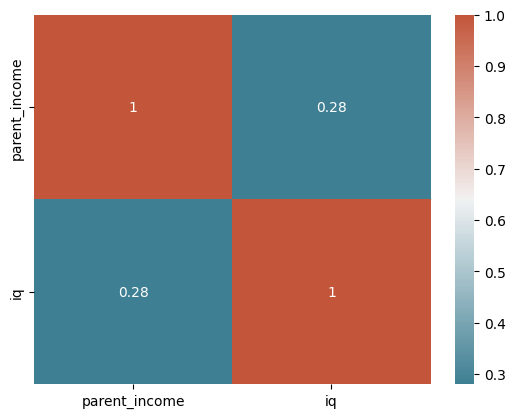

In [11]:
sns.boxplot(x = df_clean["college_plans"], y = df_clean["parent_encouragement"])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
sns.boxplot(x = df_clean["college_plans"], y = df_clean["parent_income"])

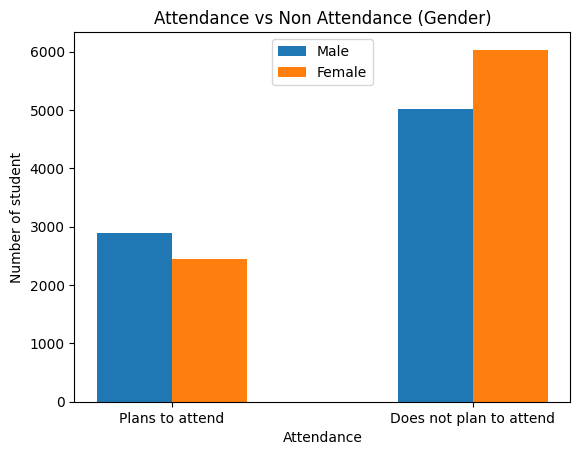

In [22]:
Male = [attend[attend['gender'] == 'Male']['gender'].count(), non_attend[non_attend['gender'] == 'Male']['gender'].count()]
Female = [attend[attend['gender'] == 'Female']['gender'].count(), non_attend[non_attend['gender'] == 'Female']['gender'].count()]
  
n = 2
r = np.arange(n)
width = 0.25
plt.bar(r, Male, width = width, label = 'Male')
plt.bar(r + width, Female, width = width, label = 'Female')

plt.xlabel("Attendance")
plt.ylabel("Number of student")
plt.title("Attendance vs Non Attendance (Gender)")

plt.xticks(r + width/ 2, ['Plans to attend', 'Does not plan to attend'])
plt.legend(loc = 'upper center')  

plt.show()

### 3.1 

In [222]:
df = df.drop('student_id', axis = 1)
df

,gender,parent_income,iq,parent_encouragement,college_plans
0,Male,31770,90,Encouraged,Does not plan to attend
1,Male,79310,110,Encouraged,Plans to attend
2,Female,36600,109,Not Encouraged,Does not plan to attend
3,Female,66770,114,Encouraged,Plans to attend
4,Male,59400,103,Encouraged,Plans to attend
...,...,...,...,...,...
16378,Male,48620,100,Encouraged,Plans to attend
16379,Male,79530,103,Encouraged,Plans to attend
16380,Male,6900,68,Not Encouraged,Does not plan to attend
16381,Female,41400,108,Encouraged,Does not plan to attend


In [223]:
le = preprocessing.LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['parent_encouragement'] = le.fit_transform(df['parent_encouragement'])
df['college_plans'] = le.fit_transform(df['college_plans'])

<Axes: >

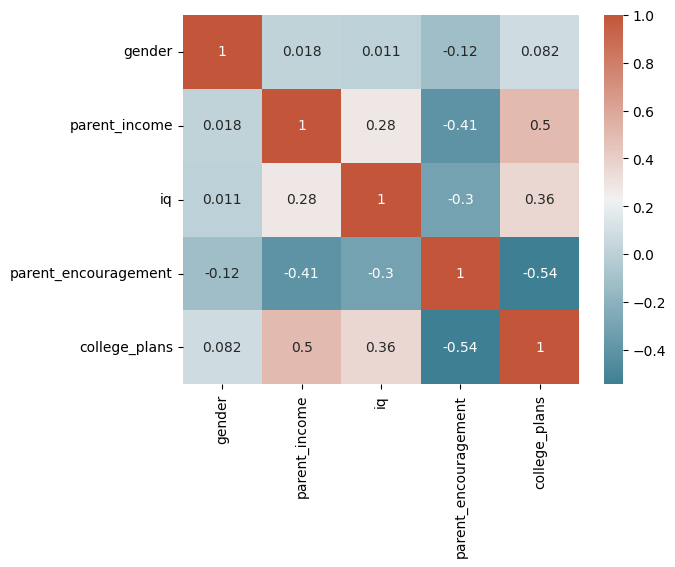

In [224]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<Axes: xlabel='college_plans', ylabel='parent_income'>

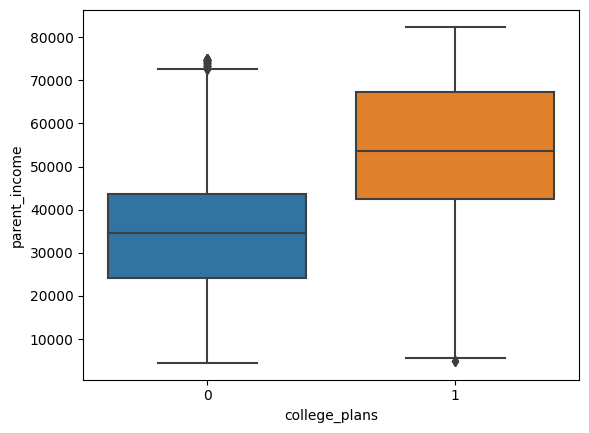

In [21]:
sns.boxplot(x = df["college_plans"], y = df["parent_income"])

<Axes: xlabel='college_plans', ylabel='iq'>

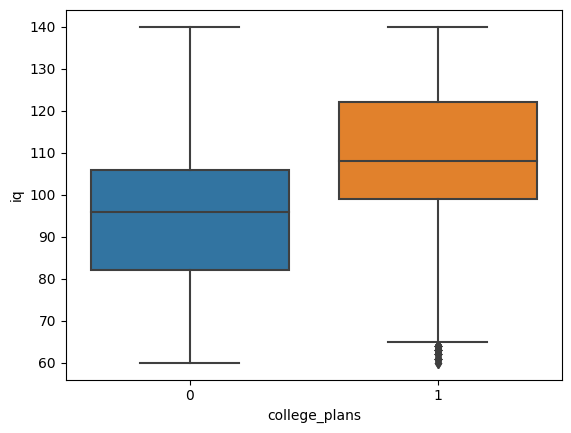

In [22]:
sns.boxplot(x = df["college_plans"], y = df["iq"])

In [225]:
df

,gender,parent_income,iq,parent_encouragement,college_plans
0,1,31770,90,0,0
1,1,79310,110,0,1
2,0,36600,109,1,0
3,0,66770,114,0,1
4,1,59400,103,0,1
...,...,...,...,...,...
16378,1,48620,100,0,1
16379,1,79530,103,0,1
16380,1,6900,68,1,0
16381,0,41400,108,0,0


In [56]:
parent_income_attendance_df = df[df['college_plans'] == 1][['parent_income', 'college_plans']]
parent_income_nonattendance_df = df[df['college_plans'] == 0][['parent_income', 'college_plans']]
iq_attendance_df = df[df['college_plans'] == 1][['iq', 'college_plans']]
iq_nonattendance_df = df[df['college_plans'] == 0][['iq', 'college_plans']]

<Axes: xlabel='parent_income', ylabel='Count'>

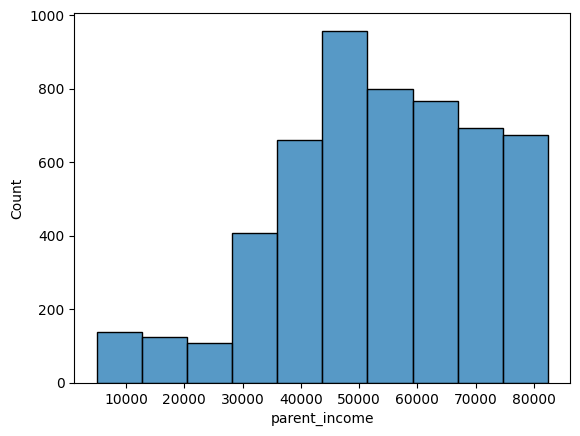

In [57]:
sns.histplot(data = parent_income_attendance_df["parent_income"], bins = 10)

<Axes: xlabel='parent_income', ylabel='Count'>

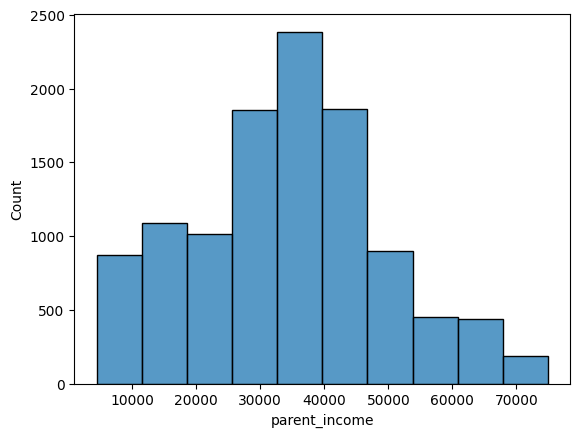

In [58]:
sns.histplot(data = parent_income_nonattendance_df["parent_income"], bins = 10)

<Axes: xlabel='iq', ylabel='Count'>

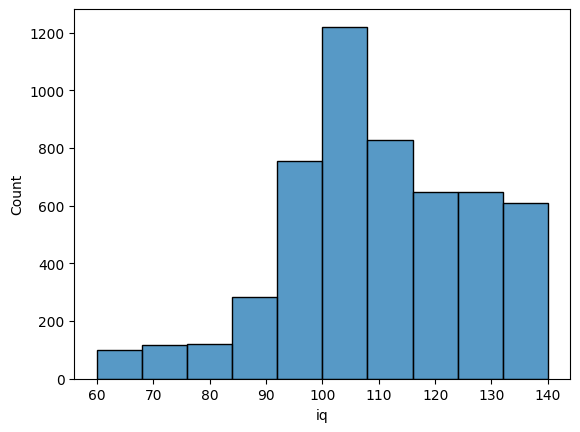

In [60]:
sns.histplot(data = iq_attendance_df["iq"], bins = 10)

<Axes: xlabel='iq', ylabel='Count'>

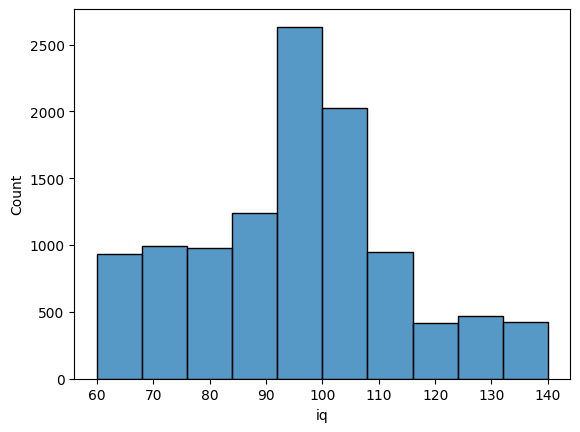

In [61]:
sns.histplot(data = iq_nonattendance_df["iq"], bins = 10)

In [226]:
target = df['college_plans']
features = df.drop('college_plans', axis = 1)

In [227]:
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [64]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
dev_predict = knn.predict(x_dev)
dev_predict

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.8604118993135011


In [131]:
n = np.arange(1, 30)
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute', 'auto']
p = [1, 2, 3, 4, 5]

In [132]:
K = []
validation = []
scores = {}
i = 0

data = {
  "no": [],
  "k": [],
  "weights": [],
  "algorithm": [],
  "p": [],
  "accr": []
}

for k in n:
    for w in weights:
        for alg in algorithm:
            for smallp in p:
                clf = KNeighborsClassifier(n_neighbors = k, weights = w, algorithm = alg, p = smallp)
                clf.fit(x_train, y_train)

                validation_score = clf.score(x_dev, y_dev)
                i = i + 1

    #             print(i, k, w, validation_score)

                data["no"].append(i)
                data["k"].append(k)
                data["weights"].append(w)
                data["algorithm"].append(alg)
                data["p"].append(smallp)
                data["accr"].append(validation_score)  

accr_df = pd.DataFrame(data);
accr_df

,no,k,weights,algorithm,p,accr
0,1,1,uniform,ball_tree,1,0.936308
1,2,1,uniform,ball_tree,2,0.934401
2,3,1,uniform,ball_tree,3,0.933638
3,4,1,uniform,ball_tree,4,0.933638
4,5,1,uniform,ball_tree,5,0.933257
...,...,...,...,...,...,...
1155,1156,29,distance,auto,1,0.927155
1156,1157,29,distance,auto,2,0.920290
1157,1158,29,distance,auto,3,0.919527
1158,1159,29,distance,auto,4,0.919146


In [138]:
accr_df['accr'].max()
accr_df[accr_df['accr'] == 0.940884820747521]

,no,k,weights,algorithm,p,accr
140,141,4,distance,ball_tree,1,0.940885
145,146,4,distance,kd_tree,1,0.940885
150,151,4,distance,brute,1,0.940885
155,156,4,distance,auto,1,0.940885


In [247]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dev_predict = dtree.predict(x_dev)
dev_predict

array([1, 1, 1, ..., 0, 0, 0])

In [248]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.9099923722349351


In [281]:
criterion = ['gini', "entropy", "log_loss"]
splitter = ["best", "random"]
i2 = 0

data2 = {
  "no": [],
  "criterion": [],
  "splitter": [],
  "accr": []
}

for c in criterion:
    for s in splitter:
        dtree2 = DecisionTreeClassifier(criterion = c, splitter = s, max_depth = 3)
        dtree2.fit(x_train, y_train)

        dev_predict = dtree2.predict(x_dev)
        accr_score = metrics.accuracy_score(y_dev, dev_predict)
        i2 = i2 + 1

        data2["no"].append(i2)
        data2["criterion"].append(c)
        data2["splitter"].append(s)
        data2["accr"].append(accr_score)  

accr_df2 = pd.DataFrame(data2);
accr_df2

,no,criterion,splitter,accr
0,1,gini,best,0.819603
1,2,gini,random,0.778032
2,3,entropy,best,0.818078
3,4,entropy,random,0.772311
4,5,log_loss,best,0.818078
5,6,log_loss,random,0.754386


In [282]:
accr_df2['accr'].max()

0.8196033562166285

In [283]:
accr_df2[accr_df2['accr'] == accr_df2['accr'].max()]

,no,criterion,splitter,accr
0,1,gini,best,0.819603


In [250]:
K = []
validation = []
scores = {}

for k in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p = 1)
    clf.fit(x_train, y_train)
    validation_score = clf.score(x_dev, y_dev)

    K.append(k)
    validation.append(validation_score)

    scores[k] = [validation_score]

for keys, values in scores.items():
    print(keys, ':', values)

1 : [0.9363081617086194]
2 : [0.9374523264683448]
3 : [0.9374523264683448]
4 : [0.940884820747521]
5 : [0.9382151029748284]
6 : [0.9344012204424104]
7 : [0.9344012204424104]
8 : [0.933257055682685]
9 : [0.9321128909229596]
10 : [0.9324942791762014]
11 : [0.933257055682685]
12 : [0.9324942791762014]
13 : [0.9309687261632341]
14 : [0.9294431731502669]
15 : [0.9309687261632341]
16 : [0.9294431731502669]
17 : [0.9282990083905416]
18 : [0.9290617848970252]
19 : [0.9279176201372997]
20 : [0.9263920671243325]
21 : [0.9260106788710908]
22 : [0.9267734553775744]
23 : [0.9263920671243325]
24 : [0.9263920671243325]
25 : [0.9267734553775744]
26 : [0.9256292906178489]
27 : [0.9263920671243325]
28 : [0.9271548436308161]
29 : [0.9271548436308161]


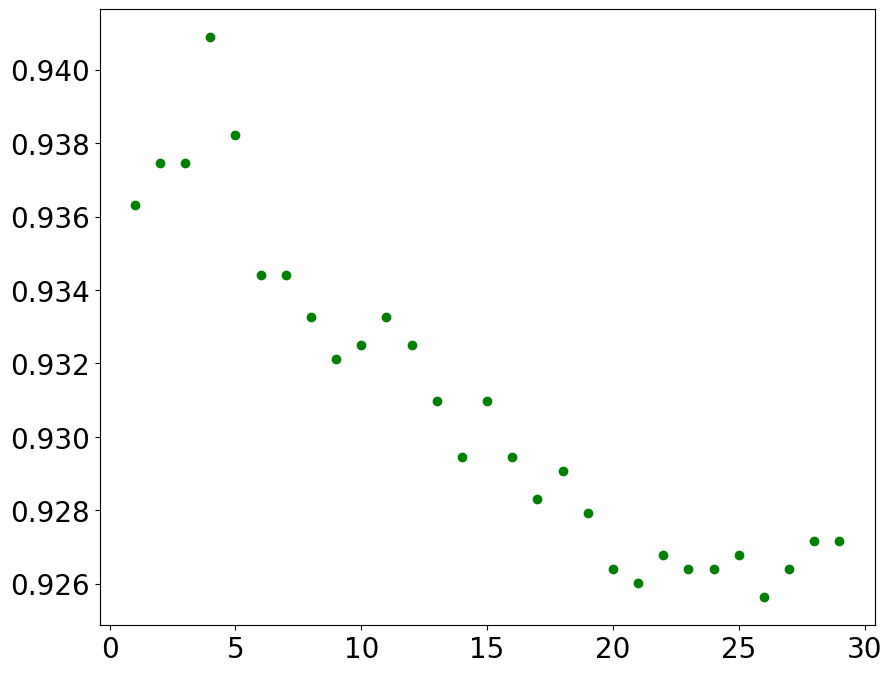

In [251]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(K, validation, color ='g')
plt.show()

In [288]:
dtree5 = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 3)
dtree5.fit(x_train, y_train)
dev_predict = dtree5.predict(x_dev)

print("Accuracy: ", metrics.accuracy_score(y_dev, dev_predict))

Accuracy:  0.8196033562166285


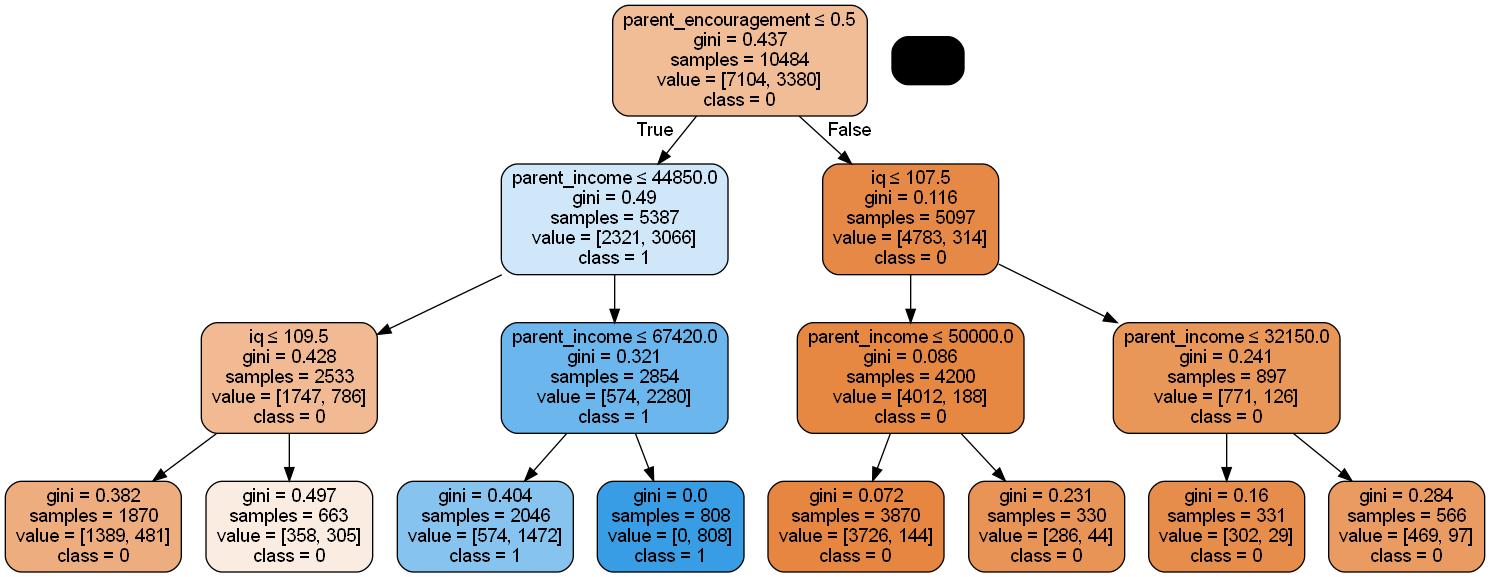

In [289]:
# Load required libraries
import six
import sys
sys.modules['sklearn.externals.six'] = six

import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()

tree.export_graphviz(dtree5,
    out_file = dot_data,
    class_names = ['0', '1'], # name of each of the target classes in asce
    feature_names = features.columns, # the feature names.
    filled = True, # whether to fill in the boxes with colors.
    rounded = True, # whether to round the corners of the boxes.
    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [290]:
# Load export_text library
from sklearn.tree import export_text

tree_rules = export_text(dtree, feature_names=list(x_train))

# Print deccision tree rules
print(tree_rules)

|--- parent_encouragement <= 0.50
|   |--- parent_income <= 44850.00
|   |   |--- iq <= 109.50
|   |   |   |--- parent_income <= 32970.00
|   |   |   |   |--- parent_income <= 28510.00
|   |   |   |   |   |--- iq <= 95.50
|   |   |   |   |   |   |--- iq <= 69.50
|   |   |   |   |   |   |   |--- iq <= 66.50
|   |   |   |   |   |   |   |   |--- iq <= 63.50
|   |   |   |   |   |   |   |   |   |--- parent_income <= 28120.00
|   |   |   |   |   |   |   |   |   |   |--- gender <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- gender >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- parent_income >  28120.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- iq >  63.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- iq >  66.50
|   |   |   |   |   |   |   |   |--- parent_income <= 71